# Data Analytics (CS61061), Autumn 2024
### Assignment 1
#### Team Members:
* Hardik Soni (20CS30023)
* Astitva (20CS30007)
* Sake Venkata Vighan Kumar (20CS30070)

# Part A:- Exploratory Data Analysis (EDA) : Unveiling Patterns in Suspect Identification Data
## Understanding the data


In [1]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 20.1 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pycountry
from scipy import stats
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

### Load the dataset into pandas dataframe
Let's start by importing our data. (**Note**: Change the File Path according to your environment and the location of the *.csv file)

In [3]:
file_path = '/kaggle/input/suspect-synthetic-data/Dataset.csv'
df = pd.read_csv(file_path)
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Possibility
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=0.5
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=0.5
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=0.5
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=0.5
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.0,United-States,<=0.5
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,NaN,NaN,0,0,40.0,United-States,>0.5
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,<=0.5
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20.0,United-States,<=0.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            30161 non-null  int64  
 1   workclass      30161 non-null  object 
 2   education      30161 non-null  object 
 3   educationno    30161 non-null  int64  
 4   maritalstatus  29961 non-null  object 
 5   occupation     30161 non-null  object 
 6   relationship   30161 non-null  object 
 7   race           29480 non-null  object 
 8   sex            29819 non-null  object 
 9   capitalgain    30161 non-null  int64  
 10  capitalloss    30161 non-null  int64  
 11  hoursperweek   29695 non-null  float64
 12  native         30161 non-null  object 
 13  Possibility    30161 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 3.2+ MB


## Fill Missing Values

The ```df.info()``` method aboves provides us with a concise saummary of a Pandas Dataframe. Here we can observe the **Data Type (Dtype)** of each feature. Another point to be noted is that the features with name **maritalstatus, race, sex, hoursperweek** have null values.

In [5]:
# Sample 500 rows and compute mode for missing categorical columns
modes = df.sample(n=500, random_state=42)[['maritalstatus', 'race', 'sex']].mode().iloc[0]

# Fill missing values with the mode and interpolate 'hoursperweek'
df.fillna(modes, inplace=True)
df['hoursperweek'].interpolate(method='pchip', inplace=True)

# Convert 'Possibility' to 0/1 based on its string values
df['Possibility'] = df['Possibility'].map({'<=0.5': 0, '>0.5': 1})

The missing values in the dataset are handled using a combination of mode imputation and interpolation:

1. ***Sampling***: A random sample of 500 rows is drawn from the dataset to ensure that the mode calculation is representative while maintaining randomness.
2. ***Mode Imputation***: The mode (most frequent value) of the sampled data is computed for each categorical column with missing values (*maritalstatus, race, sex*). The missing values in these columns are then filled with their respective modes.
3. ***Interpolation***: Missing values in the *hoursperweek* column, which is continuous, are filled using Piecewise Cubic Hermite Interpolation (```pchip```), which provides a smooth estimate between known data points.

In [6]:
convert_dict = {'age': 'int8',
                'workclass': 'category',
                'education': 'category',
                'educationno': 'int8',
                'maritalstatus': 'category',
                'occupation': 'category',
                'relationship': 'category',
                'race': 'string',
                'sex': 'category',
                'capitalgain': 'int32',
                'capitalloss': 'int32',
                'hoursperweek': 'int8',
                'native': 'category',
                'Possibility': 'int8'}
df = df.astype(convert_dict)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            30161 non-null  int8    
 1   workclass      30161 non-null  category
 2   education      30161 non-null  category
 3   educationno    30161 non-null  int8    
 4   maritalstatus  30161 non-null  category
 5   occupation     30161 non-null  category
 6   relationship   30161 non-null  category
 7   race           30161 non-null  string  
 8   sex            30161 non-null  category
 9   capitalgain    30161 non-null  int32   
 10  capitalloss    30161 non-null  int32   
 11  hoursperweek   30161 non-null  int8    
 12  native         30161 non-null  category
 13  Possibility    30161 non-null  int8    
dtypes: category(7), int32(2), int8(4), string(1)
memory usage: 799.1 KB


In [8]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek,Possibility
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.939956,0.248931
std,13.134830,2.550037,7406.466611,404.121321,11.936345,0.432401
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [9]:
# A sample of the data after data types changes
df.sample(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Possibility
20153,24,Private,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,32,United-States,0
24476,24,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
28827,22,Self-emp-not-inc,Some-college,10,Never-married,Sales,Own-child,Black,Male,99999,0,55,United-States,1
19582,67,Private,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Black,Male,10566,0,40,United-States,0
17780,53,Private,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,50,Germany,1
17084,39,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,1
11256,55,Local-gov,HS-grad,9,Married-civ-spouse,Prof-specialty,Other-relative,White,Female,0,2246,40,United-States,1
2088,44,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Poland,0
3161,20,Private,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,43,United-States,0
23754,19,Private,10th,6,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,39,United-States,0


As we see in the latest results, we can greatly reduce the memory size of our DataFrame by changing the data types and downcasting integers and floats. Please note that **these steps can be optional**, but can be very useful if we’re working with a large dataset.


## Analyzing and Visualizing the Data
### Category Distribution and Univariate Correlation Analysis

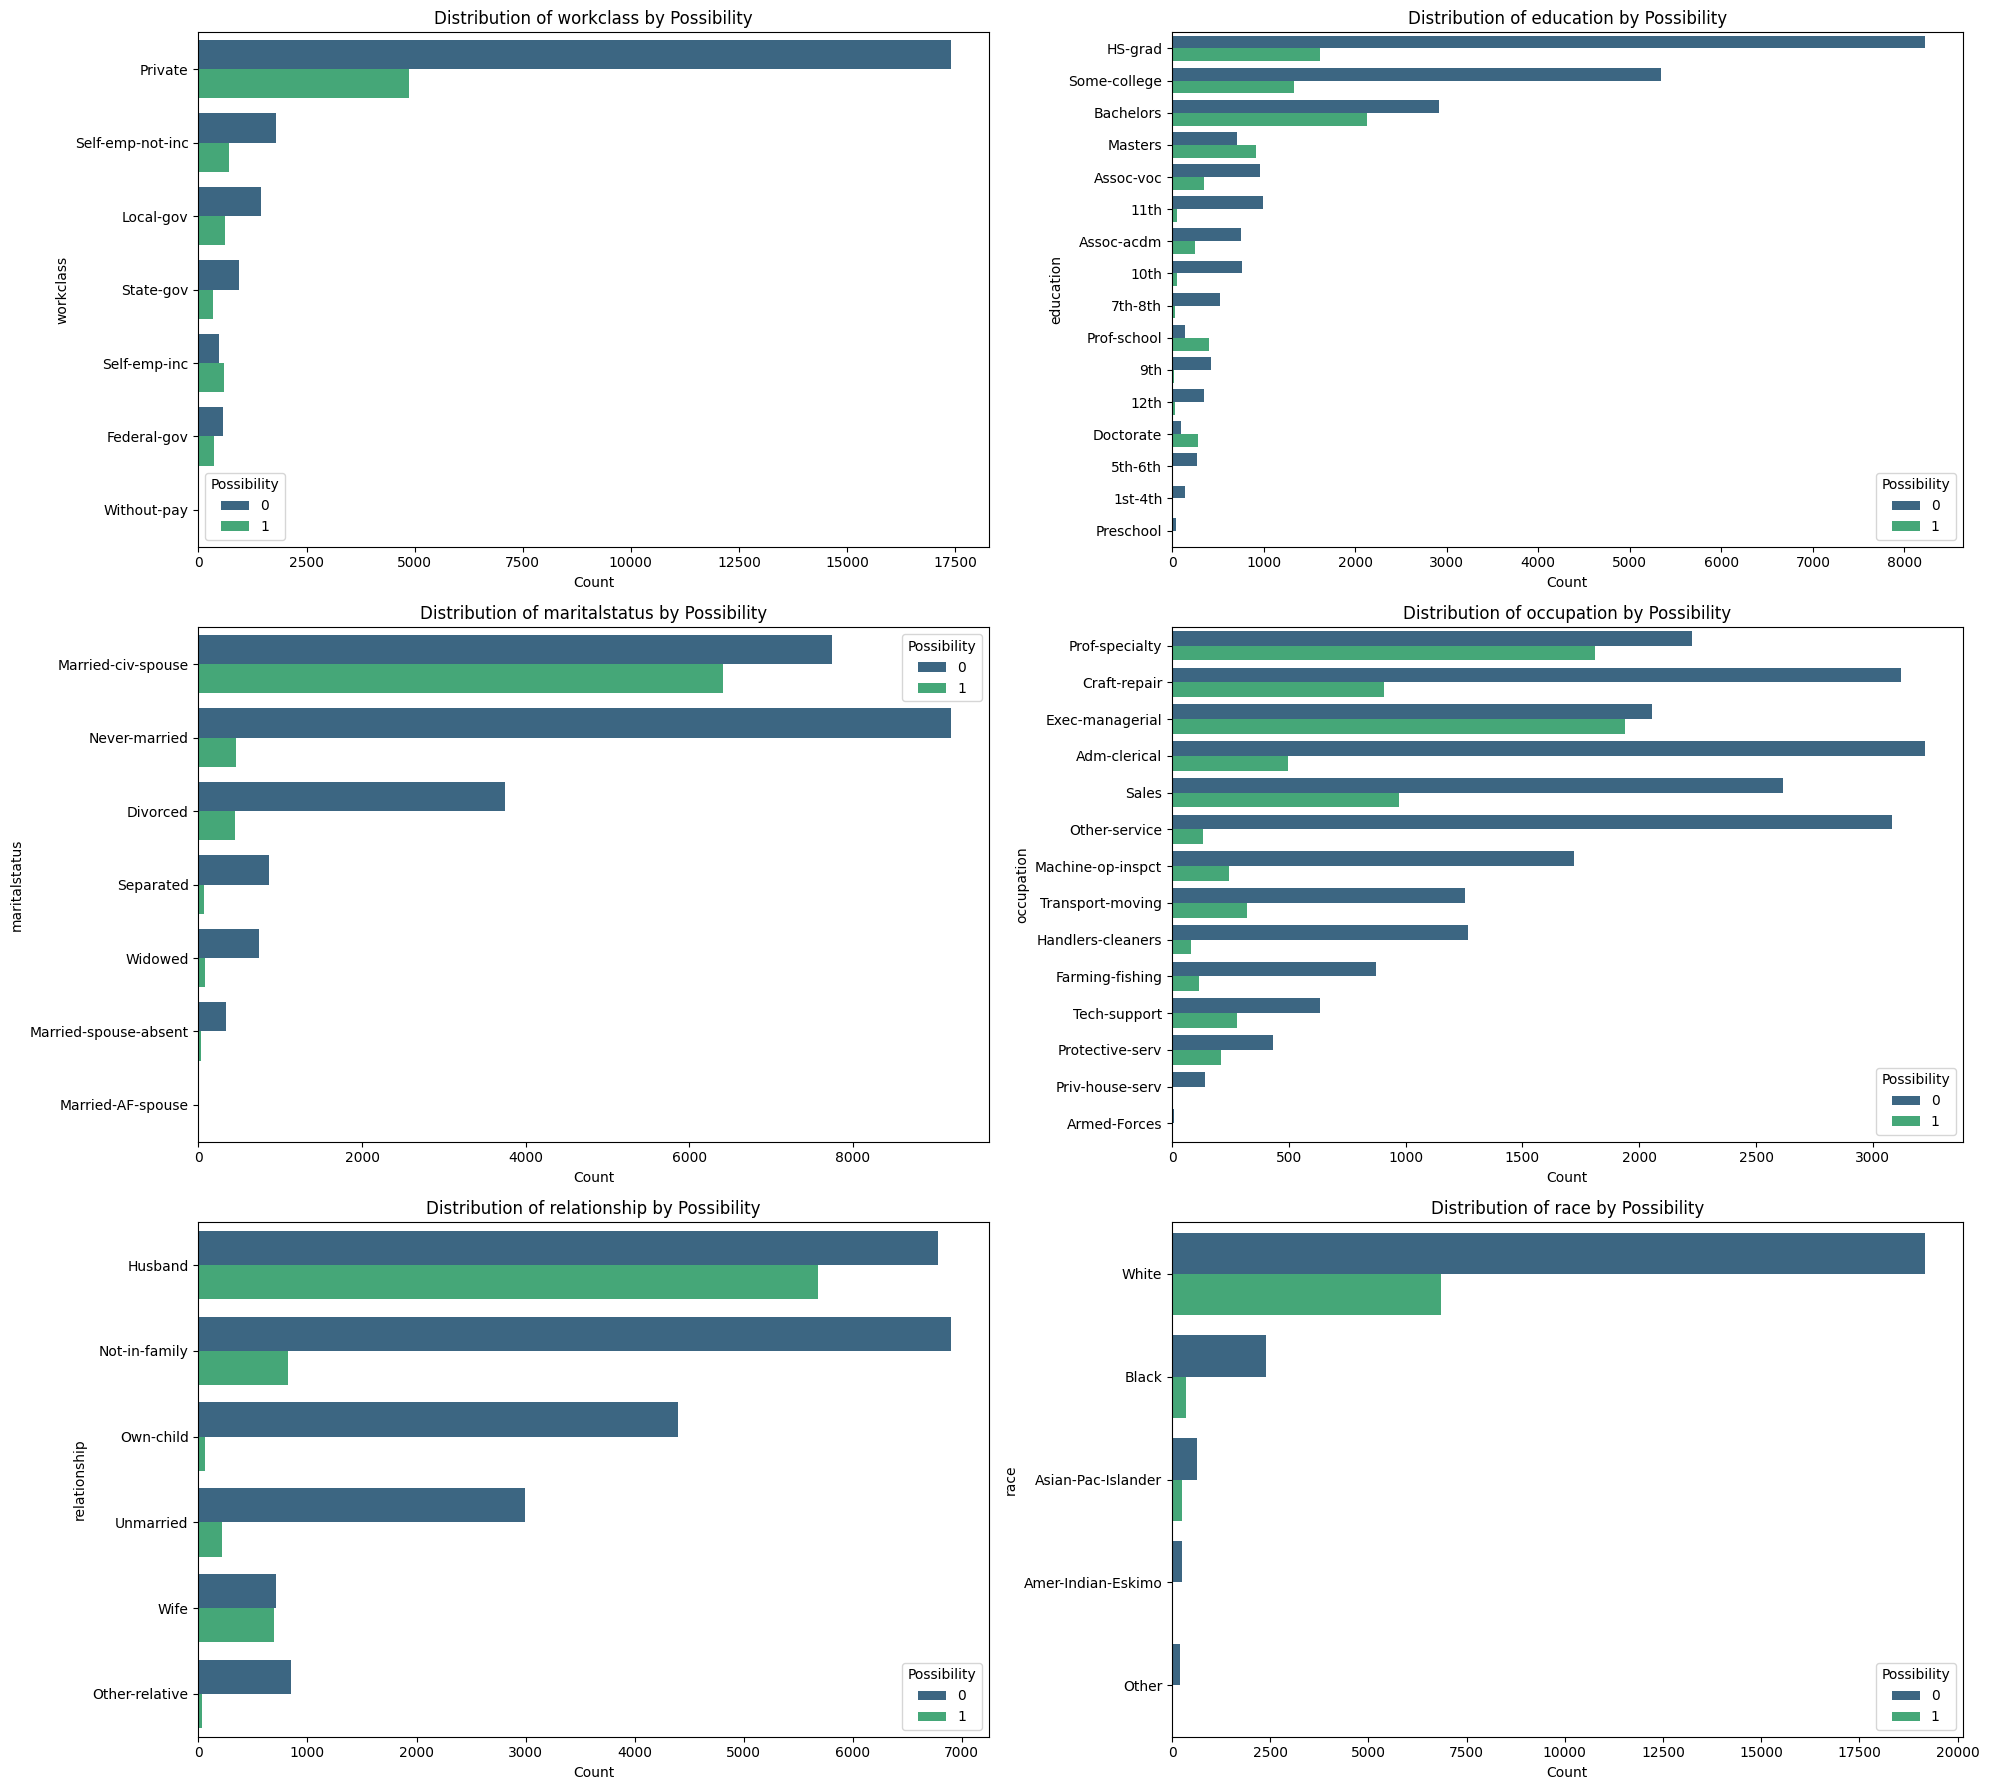

In [10]:
# List of categorical features to plot
features_to_plot = ['workclass', 'education', 'maritalstatus',
                    'occupation', 'relationship', 'race']

# Set the plot size
plt.figure(figsize=(20, 18))

# Create subplots
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 2, i)  # Adjust subplot grid based on the number of features
    sns.countplot(y=feature, data=df, hue='Possibility', 
                  order=df[feature].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {feature} by Possibility')
    plt.xlabel('Count')
    plt.ylabel(feature)

# Adjust layout
plt.tight_layout()
plt.show()

In [11]:
native_counts = df['native'].value_counts().reset_index()
native_counts.columns = ['Country', 'Count']
# Function to get ISO 3166-1 alpha-3 code
def get_country_code(name):
    # Special cases and known issues
    name_mapping = {
        'United-States': 'USA',
        'Puerto-Rico': 'PRI',
        'Dominican-Republic': 'DOM',
        'South': 'ZAF',  # assuming it refers to South Africa
        'Columbia': 'COL',  # corrected to Colombia
        'Outlying-US(Guam-USVI-etc)': 'GUM',  # Guantanamo Bay
        'Hong': 'HKG',  # assuming Hong Kong
        'Trinadad&Tobago': 'TTO',
        'Yugoslavia': 'YUG',  # deprecated, but code exists
        'Laos': 'LAO',
        'Cambodia': 'KHM',
        'Thailand': 'THA',
        'Scotland': 'GBR'  # part of the UK
    }
    try:
        return pycountry.countries.lookup(name).alpha_3
    except LookupError:
        return name_mapping.get(name, 'Unknown')

# Apply the function to get country codes
native_counts['Country_code'] = native_counts['Country'].apply(lambda x: get_country_code(x) or 'Unknown')

# Filter out any rows with unknown country codes
native_counts = native_counts[native_counts['Country_code'] != 'Unknown']

# Define color intervals
bins = [0, 10, 20, 50, 100, 200, 650, 30000]  # Define bins according to the count values
labels = ['0-10', '11-20', '21-50', '51-100', '101-200', '200-650', '650+']

native_counts['Count_bins'] = pd.cut(native_counts['Count'], bins=bins, labels=labels)

# Create the choropleth map with improved color scheme and actual count in pop-up
fig = px.choropleth(
    native_counts,
    locations='Country_code',
    color='Count_bins',
    hover_name='Country',
    hover_data={'Count': True, 'Count_bins': True},  # Show actual count and hide bins in hover
    color_discrete_map={
        '0-10': 'lightyellow',
        '11-20': 'lightgreen',
        '21-50': 'lightblue',
        '51-100': 'orange',
        '101-200': 'blue',
        '200-650': 'purple',
        '650+': 'darkblue'
    },
    labels={'Count': 'Number of Individuals', 'Country': 'Country'},
)
# Adjust the layout for height and width
fig.update_layout(
    title={'text': 'Geographical Distribution of \'native\' Countries', 'x': 0.5, 'xanchor': 'center'},
    height=800,  # Set height
    width=1600,  # Set width
    font=dict(
        family="Arial",
        size=16,
        color="Gray"
    ),
    title_font=dict(
        family="Roboto",
        size=24,
        color="Black"
    )
)
# Show the figure
fig.show()

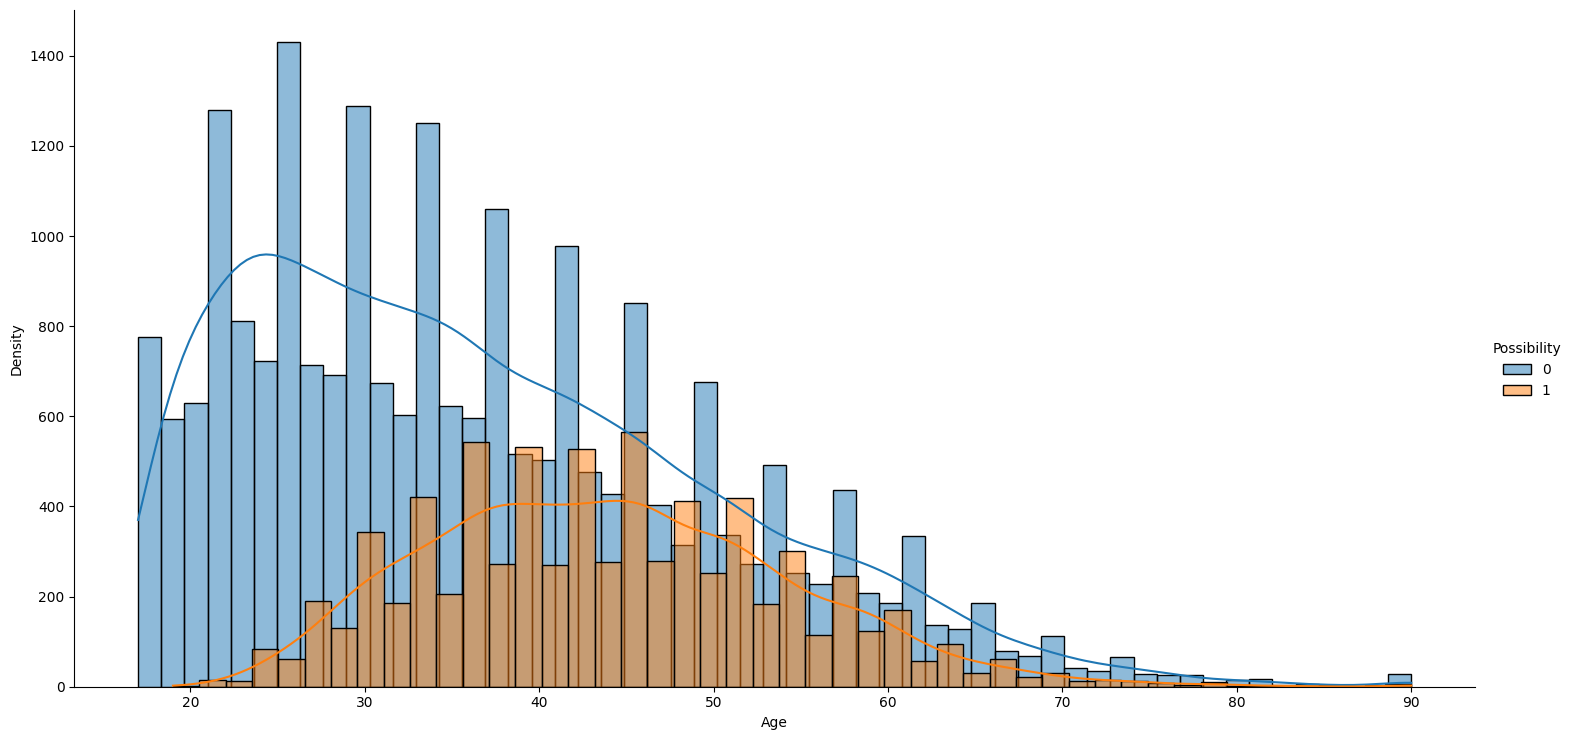

In [12]:
g = sns.FacetGrid(df, hue='Possibility', height=7.5, aspect=2)
g.map(sns.histplot, 'age', kde=True).add_legend()
g.set_axis_labels('Age', 'Density')
g.set_titles('Distribution of Age by Possibility')
plt.show()

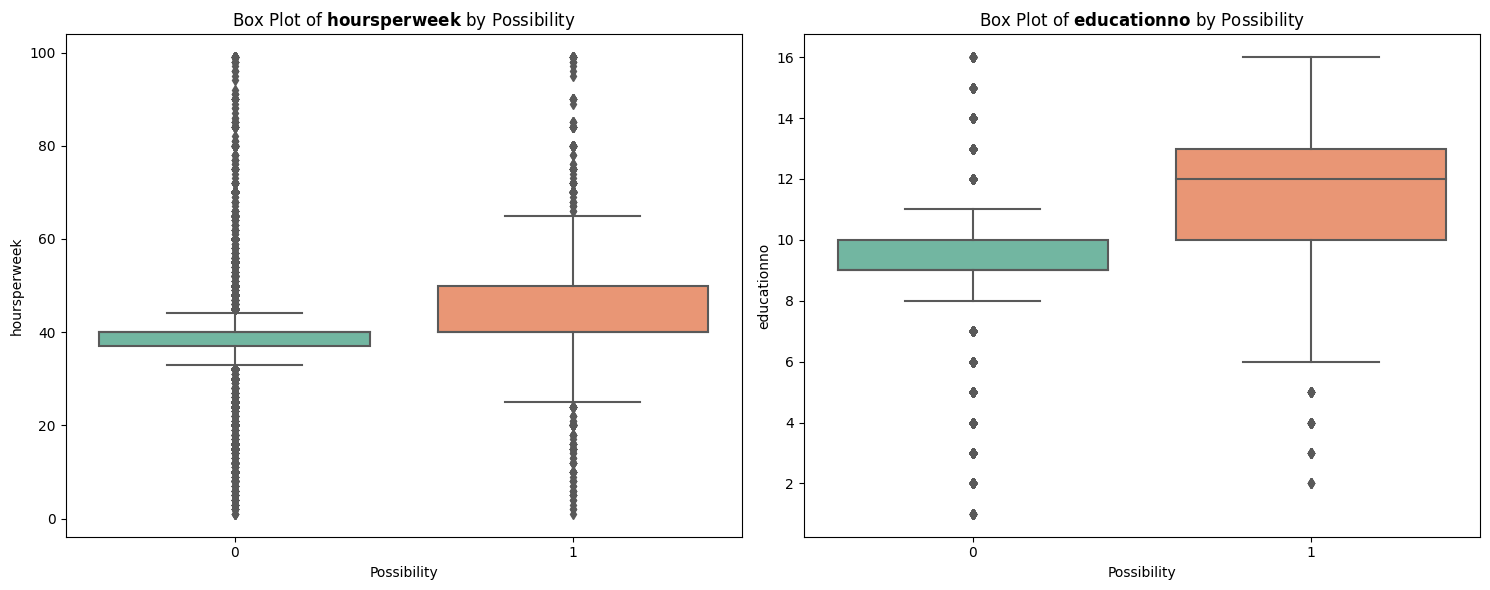

In [13]:
features = ['hoursperweek', 'educationno']

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1x2 grid for subplots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the features and plot each one
for i, feature in enumerate(features):
    sns.boxplot(x='Possibility', y=feature, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Box Plot of $\mathbf{{{feature}}}$ by Possibility')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

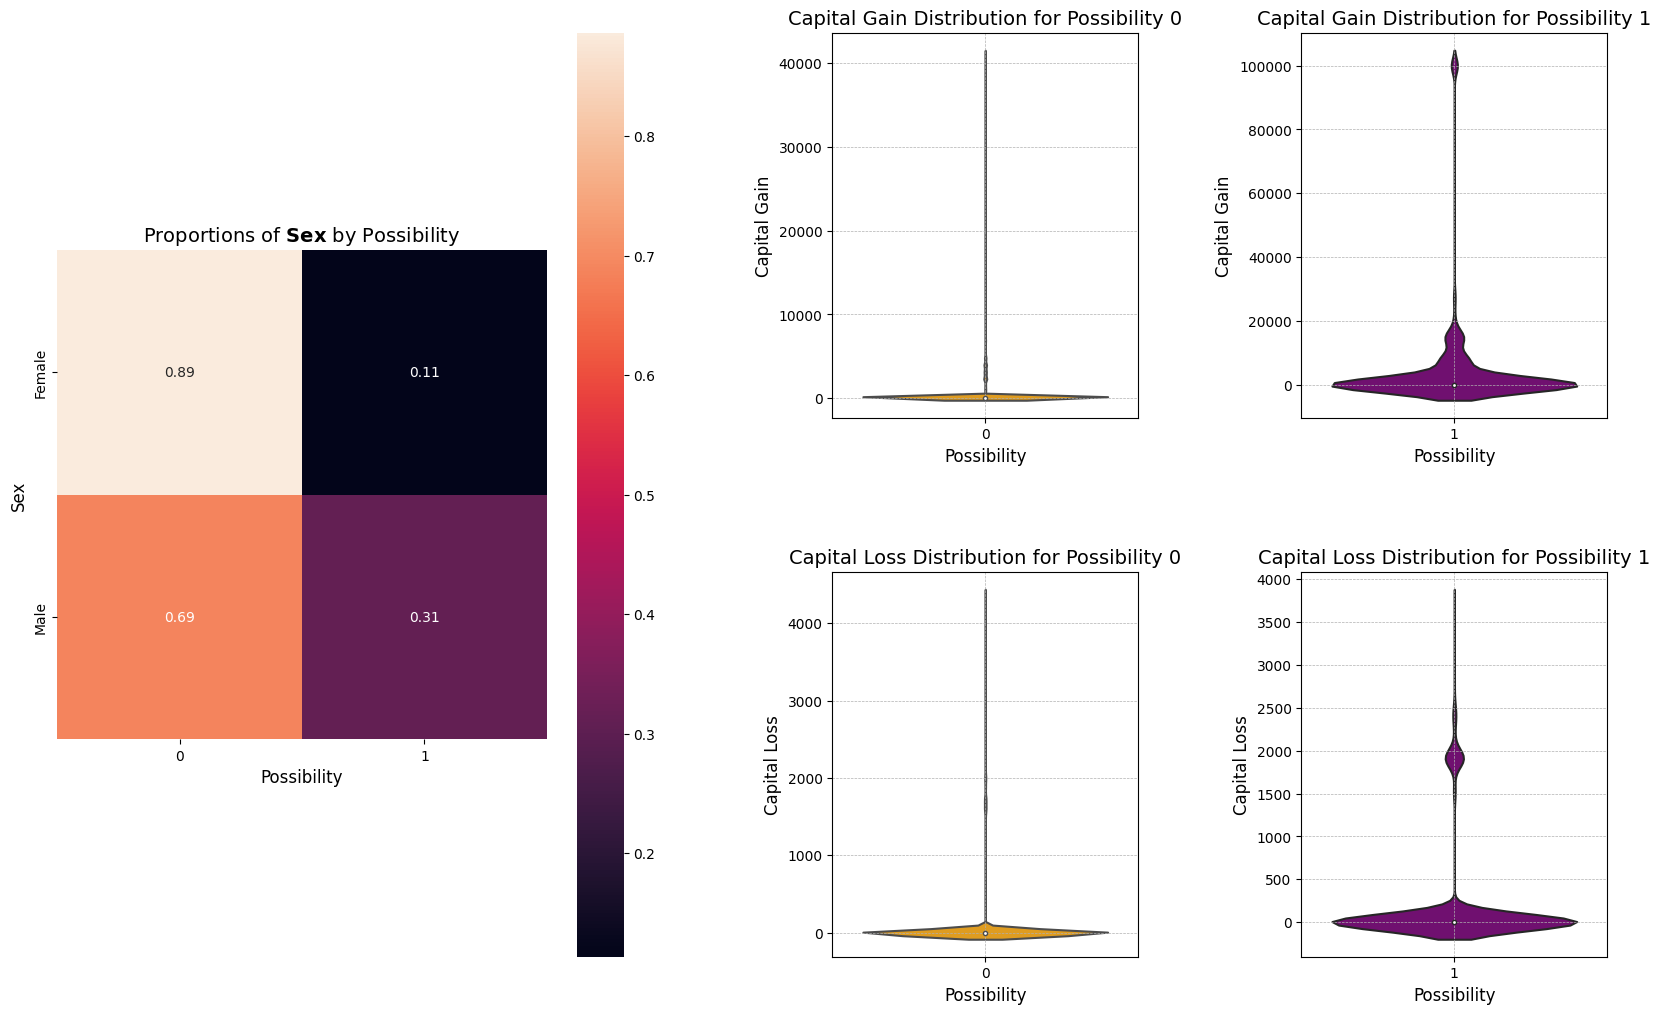

In [14]:
proportions = pd.crosstab(df['sex'], df['Possibility'], normalize='index')

# Set up the matplotlib figure with a 2x3 grid
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 3, width_ratios=[1, 0.5, 0.5], height_ratios=[1, 1], wspace=0.4, hspace=0.4)

# Create the heatmap in the first column, adjusting its height to be equal to its width
ax0 = fig.add_subplot(gs[:, 0])
sns.heatmap(proportions, annot=True, cbar=True, fmt='.2f', ax=ax0)
ax0.set_xlabel('Possibility', fontsize=12)
ax0.set_ylabel('Sex', fontsize=12)
ax0.set_title(r'Proportions of $\mathbf{Sex}$ by Possibility', fontsize=14)

# Adjust the heatmap aspect ratio
ax0.set_aspect('equal')

# Define the plot parameters
plot_params = [
    ('capitalgain', 'orange', 'Capital Gain Distribution for Possibility 0', 0, fig.add_subplot(gs[0, 1])),
    ('capitalgain', 'purple', 'Capital Gain Distribution for Possibility 1', 1, fig.add_subplot(gs[0, 2])),
    ('capitalloss', 'orange', 'Capital Loss Distribution for Possibility 0', 0, fig.add_subplot(gs[1, 1])),
    ('capitalloss', 'purple', 'Capital Loss Distribution for Possibility 1', 1, fig.add_subplot(gs[1, 2]))
]

# Loop through the plot parameters
for var, color, title, possibility, ax in plot_params:
    sns.violinplot(x='Possibility', y=var, data=df[df['Possibility'] == possibility], ax=ax, palette=[color])
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Possibility', fontsize=12)
    ax.set_ylabel(var.replace('capital', 'Capital ').title(), fontsize=12)
    ax.set_xticklabels([str(possibility)])
    ax.grid(True, linestyle='--', linewidth=0.5)

# Adjust layout to ensure proper spacing
plt.tight_layout()
plt.show()

### Multivariate Correlation Analysis
Multivariate correlation analysis examines the relationships between multiple variables simultaneously. This often involves creating a correlation matrix and visualizing it using a heatmap.

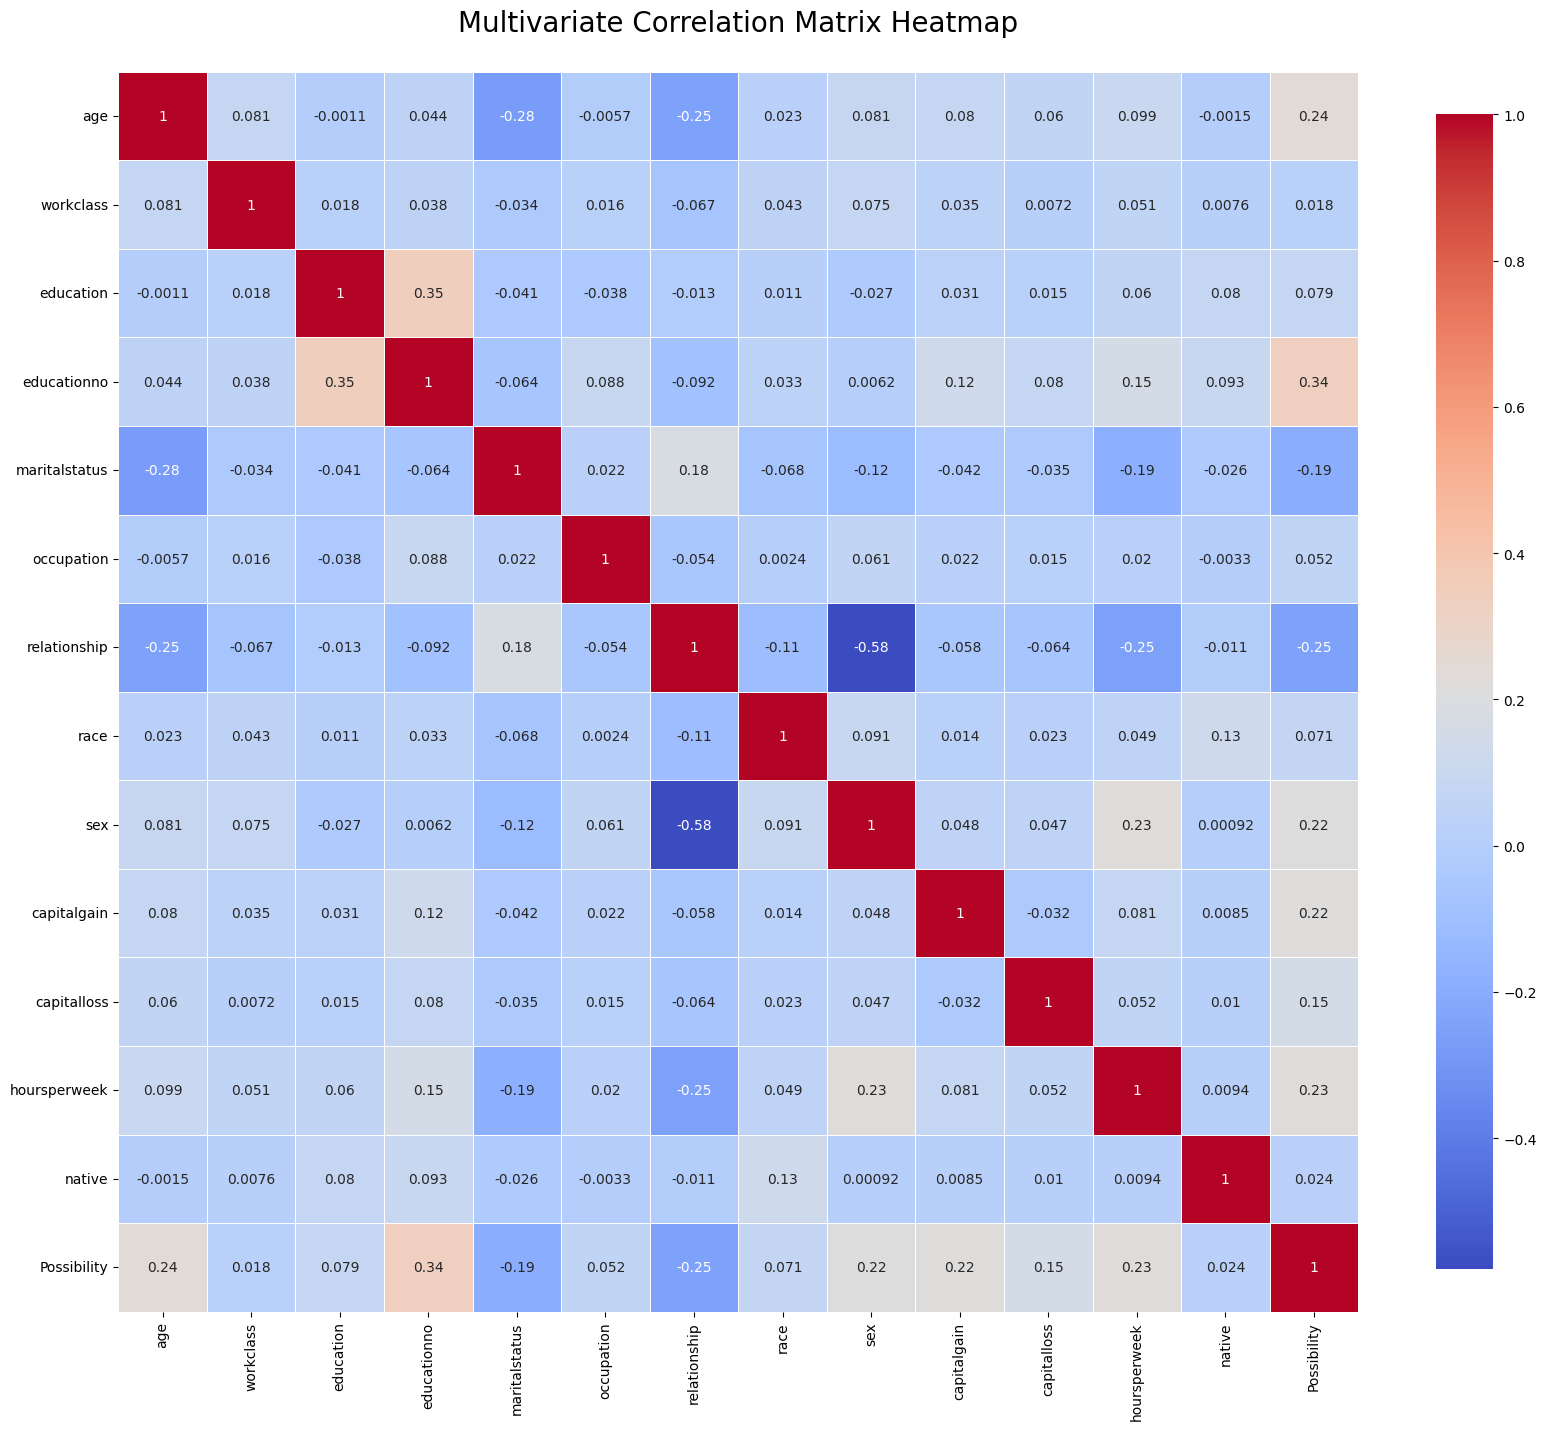

In [15]:
# List of categorical columns
categorical_cols = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']
df_label = df.copy()
# Apply LabelEncoder to each categorical column and store encoders
label_encoders = {col: LabelEncoder().fit(df[col]) for col in categorical_cols}
# Transform categorical columns using the fitted encoders
df_label[categorical_cols] = df[categorical_cols].apply(lambda col: label_encoders[col.name].transform(col))
corr_matrix = df_label.corr()
# Visualize the correlation matrix
plt.figure(figsize=(20, 20)) 
# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={"shrink": .75})
# Add a title
plt.title("Multivariate Correlation Matrix Heatmap\n", fontsize=20)
# Show the plot
plt.show()

Based on the initial heatmap analysis, the following features have been identified as potentially influential in determining the likelihood of someone being a criminal suspect:

1. **age**
2. **educationno**
3. **sex**
4. **capitalgain**
5. **capitalloss**
6. **hoursperweek**

### Basic Wrangling to Improve Accuracy of Models
Note: If you wish to see the difference in accuracy with and without wrangling, just comment the wrangle function and it's call in the cell below.

In [16]:
def wrangle(df):
    """
    Filters the dataset by applying specific wrangling rules:
    1. Removes rows where 'age' exceeds 80.
    2. Filters out rows where categorical columns have unique values and 'Possibility' is 0.
    
    Parameters:
    df (DataFrame): The input DataFrame to be wrangled.
    
    Returns:
    DataFrame: The filtered DataFrame.
    """
    
    # Remove rows where 'age' is greater than 80
    mask_age = df['age'] <= 80
    
    # Define categorical columns to check for unique values
    cols = ['workclass', 'occupation', 'relationship', 'race']
    
    # Compute counts of unique values in categorical columns and add 'Possibility'
    counts = df[cols + ['Possibility']].groupby(cols).size().reset_index(name='count')
    
    # Identify categorical rows with only one occurrence
    singles = counts[counts['count'] == 1]
    
    # Create mask to filter out rows where categorical values are unique and 'Possibility' is 0
    mask_cat = ~(
        df[cols].merge(singles, how='left', on=cols, indicator=True)['_merge'] == 'both'
    ) | (df['Possibility'] != 0)
    
    # Apply masks to filter the DataFrame
    df_filtered = df[mask_age & mask_cat]
    
    return df_filtered

In [17]:
df = wrangle(df)
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Possibility
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


# Part B:- Implementing Naive Bayes from Scratch: A Custom Approach to Suspect Identification

In [18]:
import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.stats import multivariate_normal as mvn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
ensemble_clf = []
acc_clf = {}
report_clf = {}
roc_area = {}

In [19]:
class GaussianNaiveBayes(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.class_priors = {}
        self.likelihoods = {}
    
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.num_features_ = X.shape[1]
        
        # Initialize likelihoods
        self.likelihoods = {c: [] for c in self.classes_}
        
        # Calculate class priors
        self.class_priors = {c: np.mean(y == c) for c in self.classes_}
        
        # Calculate mean and variance for each feature per class
        for c in self.classes_:
            X_c = X[y == c]
            means = np.mean(X_c, axis=0)
            variances = np.var(X_c, axis=0)
            self.likelihoods[c] = (means, variances)
        
        return self
    
    def predict(self, X):
        results = []
        
        for i in range(X.shape[0]):
            query = X[i]
            probs = {}
            
            for c in self.classes_:
                prior = self.class_priors[c]
                means, variances = self.likelihoods[c]
                likelihood = 1
                
                for j in range(self.num_features_):
                    mean = means[j]
                    var = variances[j]
                    if var > 0:
                        likelihood *= (1 / math.sqrt(2 * math.pi * var)) * np.exp(-(query[j] - mean) ** 2 / (2 * var))
                    else:
                        likelihood *= 1e-10
                
                probs[c] = likelihood * prior
            
            result = max(probs, key=probs.get)
            results.append(result)
        
        return np.array(results)
    
    def predict_proba(self, X):
        probas = []
        
        for i in range(X.shape[0]):
            query = X[i]
            probs = np.zeros(len(self.classes_))
            
            for idx, c in enumerate(self.classes_):
                prior = self.class_priors[c]
                means, variances = self.likelihoods[c]
                likelihood = 1
                
                for j in range(self.num_features_):
                    mean = means[j]
                    var = variances[j]
                    if var > 0:
                        likelihood *= (1 / math.sqrt(2 * math.pi * var)) * np.exp(-(query[j] - mean) ** 2 / (2 * var))
                    else:
                        # Avoid zero variance, assign a very small value to avoid zero probabilities
                        likelihood *= 1e-10
                
                probs[idx] = likelihood * prior
            
            # Check for NaNs and handle them
            if np.any(np.isnan(probs)) or np.all(probs == 0):
                probs = np.zeros(len(self.classes_))
                probs[0] = 1.0
            
            # Normalize probabilities to sum to 1
            probs /= probs.sum()
            probas.append(probs)
        
        return np.array(probas)


In [20]:
# Define the categorical columns
categorical_cols = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']

# Define the numerical columns
numerical_cols = ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

# Create a ColumnTransformer with OneHotEncoder for categorical columns and StandardScaler for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'  # Ensure all columns are processed
)

# Create a pipeline
model_pipeline_nv = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNaiveBayes())
])

In [21]:
# Separate features and labels
X = df.drop(columns=['Possibility'])
y = df['Possibility']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the model
model_pipeline_nv.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['workclass', 'education',
                                                   'maritalstatus',
                                                   'occupation', 'relationship',
                                                   'race', 'sex', 'native']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'educationno',
                                                   'capitalgain', 'capitalloss',
                                                   'hoursperweek'])])),
                ('classifier', GaussianNaiveBayes())])

In [22]:
# Predict on the test set
y_pred_ori = model_pipeline_nv.predict(X_test)

# Evaluate the model
accuracy = 100 * accuracy_score(y_test, y_pred_ori)
cr = classification_report(y_test, y_pred_ori)
print(f"Accuracy: {accuracy:.3f} %.\n")
print("Classification Report:\n", cr)

ensemble_clf.append(model_pipeline_nv)
acc_clf['nb_m'] = accuracy
report_clf['nb_m'] = classification_report(y_test, y_pred_ori, output_dict=True)

Accuracy: 77.614 %.

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.98      0.87      4491
           1       0.72      0.16      0.26      1486

    accuracy                           0.78      5977
   macro avg       0.75      0.57      0.57      5977
weighted avg       0.76      0.78      0.72      5977



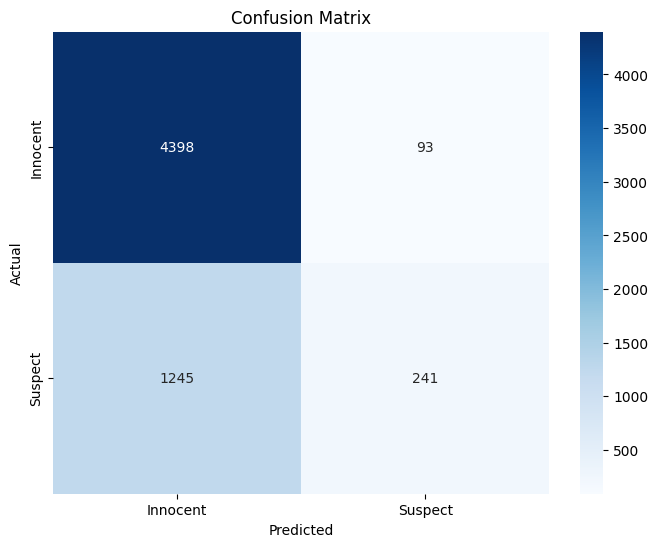

In [23]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_ori)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Innocent', 'Suspect'], yticklabels=['Innocent', 'Suspect'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

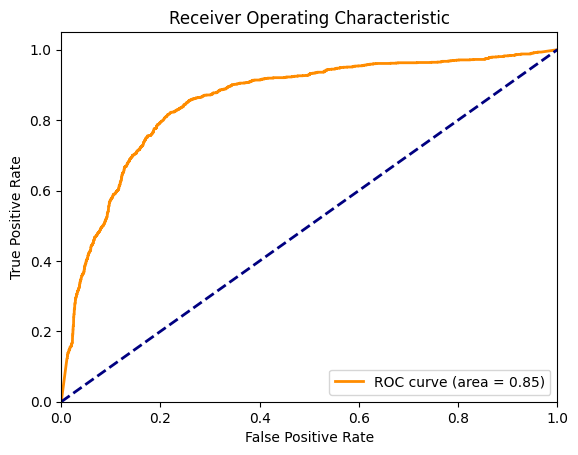

In [24]:
# ROC Curve
y_prob = model_pipeline_nv.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_area['nb_m'] = roc_auc
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

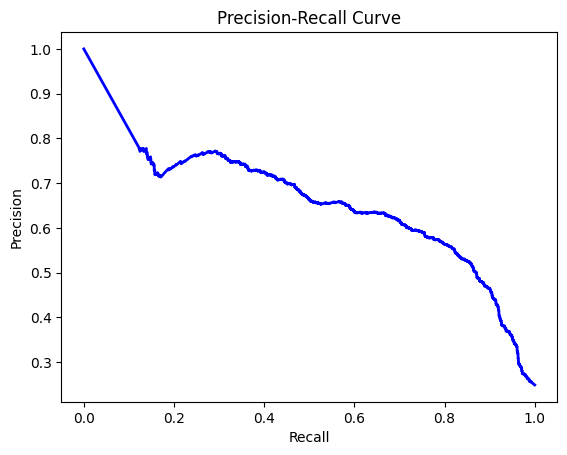

In [25]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Part C:- Comparative Analysis of Custom and Sklearn-Based Classifiers for Suspect Identification

## Gaussian Naive-Bayes Algorithm

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve

In [27]:
# Create a ColumnTransformer with OneHotEncoder for categorical columns and StandardScaler for numerical columns
preprocessor_nb = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols),
    ],
    remainder='passthrough'  # Ensure all columns are processed
)
# Create a pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_nb),
    ('classifier', GaussianNB())
])
# Train the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['workclass', 'education',
                                                   'maritalstatus',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native'])])),
                ('classifier', GaussianNB())])

In [28]:
# Predict on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = 100 * accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f} %.\n")
print("Classification Report:\n", cr)

ensemble_clf.append(model_pipeline)
acc_clf['nb'] = accuracy
report_clf['nb'] = classification_report(y_test, y_pred, output_dict=True)

Accuracy: 82.065 %.

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      4491
           1       0.62      0.72      0.67      1486

    accuracy                           0.82      5977
   macro avg       0.76      0.79      0.77      5977
weighted avg       0.83      0.82      0.82      5977



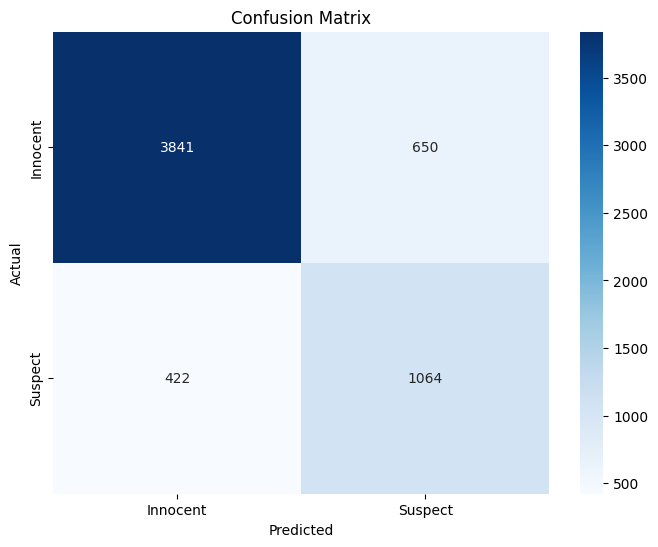

In [29]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Innocent', 'Suspect'], yticklabels=['Innocent', 'Suspect'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

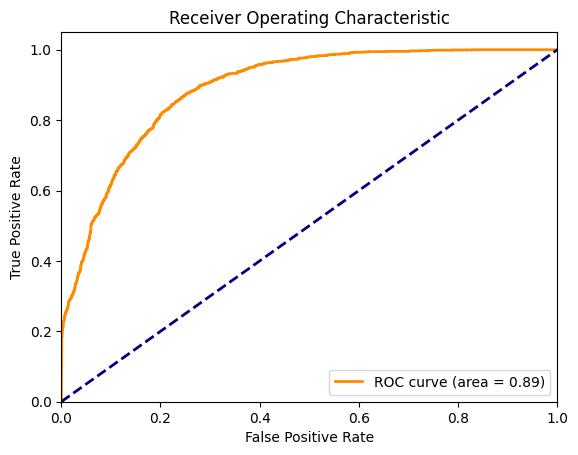

In [30]:
# ROC Curve
y_prob = model_pipeline.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_area['nb'] = roc_auc
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

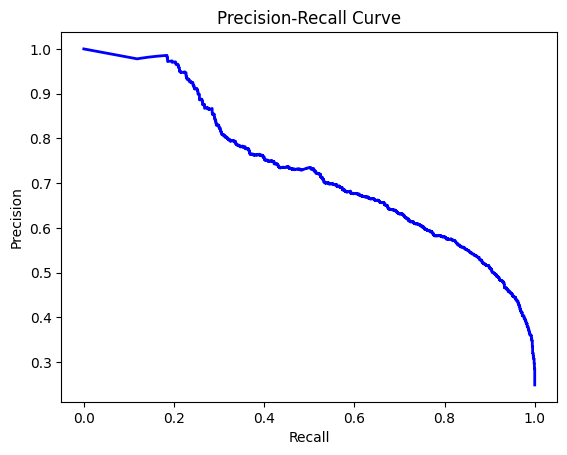

In [31]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Support Vector Classifier (SVC)

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [33]:
# Create a pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', probability=True, random_state=42))
])
# Train the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['workclass', 'education',
                                                   'maritalstatus',
                                                   'occupation', 'relationship',
                                                   'race', 'sex', 'native']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'educationno',
                                                   'capitalgain', 'capitalloss',
                                                   'hoursperweek'])])),
                ('classifier',
                 SVC(kernel='linear', probability=True, random_state=42))])

In [34]:
# Predict on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = 100 * accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f} %.\n")
print("Classification Report:\n", cr)

ensemble_clf.append(model_pipeline)
acc_clf['svc'] = accuracy
report_clf['svc'] = classification_report(y_test, y_pred, output_dict=True)

Accuracy: 84.775 %.

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      4491
           1       0.74      0.60      0.66      1486

    accuracy                           0.85      5977
   macro avg       0.81      0.76      0.78      5977
weighted avg       0.84      0.85      0.84      5977



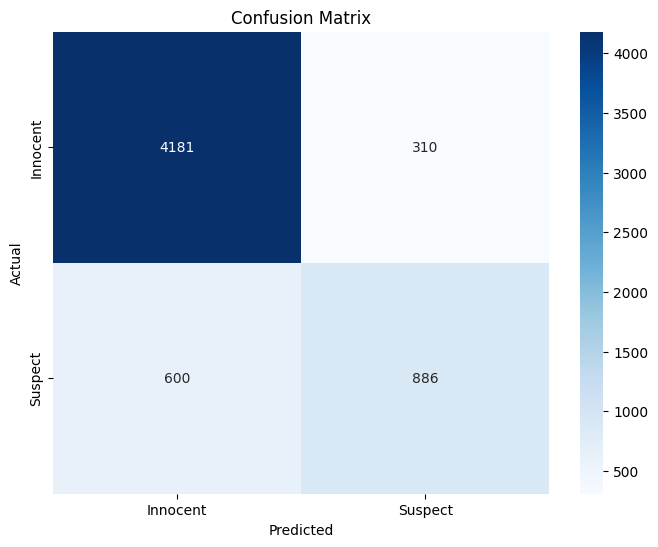

In [35]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Innocent', 'Suspect'], yticklabels=['Innocent', 'Suspect'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

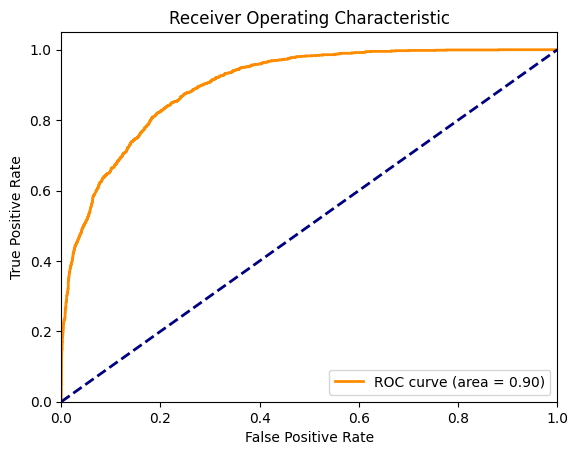

In [36]:
# ROC Curve
y_prob = model_pipeline.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_area['svc'] = roc_auc
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

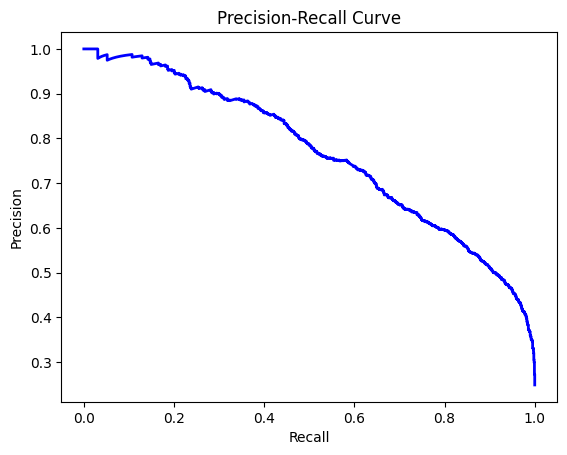

In [37]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## K-Nearest Neighbours (kNN)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [39]:
# Create a pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])
# Train the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['workclass', 'education',
                                                   'maritalstatus',
                                                   'occupation', 'relationship',
                                                   'race', 'sex', 'native']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'educationno',
                                                   'capitalgain', 'capitalloss',
                                                   'hoursperweek'])])),
                ('classifier', KNeighborsClassifier())])

In [40]:
# Predict on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = 100 * accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f} %.\n")
print("Classification Report:\n", cr)

ensemble_clf.append(model_pipeline)
acc_clf['knn'] = accuracy
report_clf['knn'] = classification_report(y_test, y_pred, output_dict=True)

Accuracy: 83.002 %.

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      4491
           1       0.67      0.63      0.65      1486

    accuracy                           0.83      5977
   macro avg       0.77      0.76      0.77      5977
weighted avg       0.83      0.83      0.83      5977



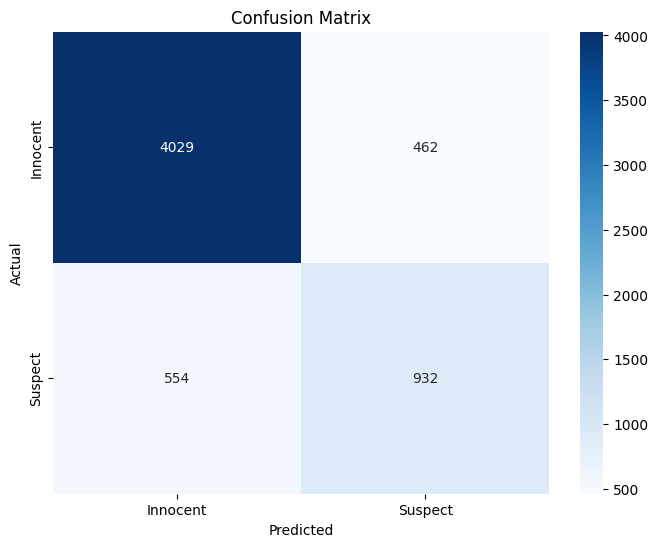

In [41]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Innocent', 'Suspect'], yticklabels=['Innocent', 'Suspect'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

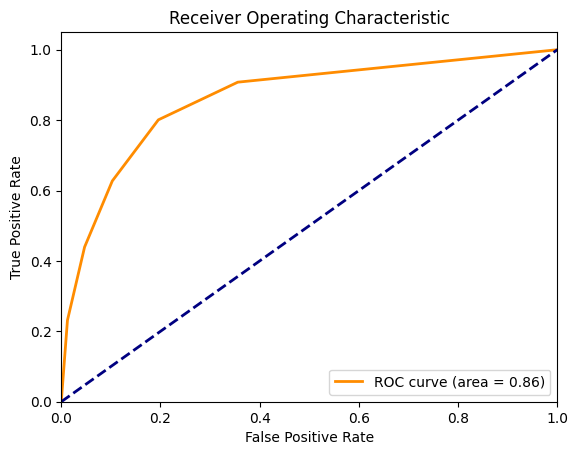

In [42]:
# ROC Curve
y_prob = model_pipeline.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_area['knn'] = roc_auc
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

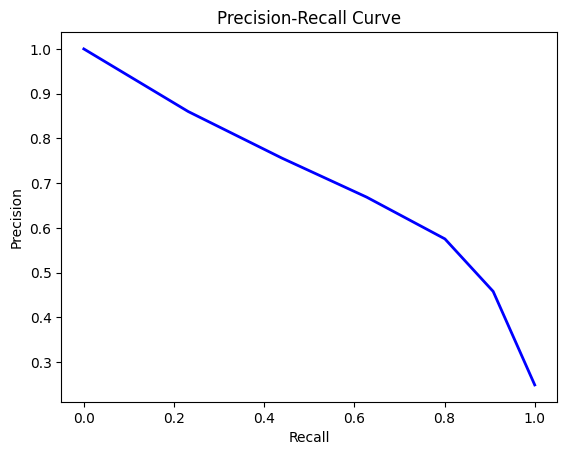

In [43]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Decision Tree (DT)

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [45]:
# Create a pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
# Train the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['workclass', 'education',
                                                   'maritalstatus',
                                                   'occupation', 'relationship',
                                                   'race', 'sex', 'native']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'educationno',
                                                   'capitalgain', 'capitalloss',
                                                   'hoursperweek'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [46]:
# Predict on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = 100 * accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f} %.\n")
print("Classification Report:\n", cr)

ensemble_clf.append(model_pipeline)
acc_clf['dt'] = accuracy
report_clf['dt'] = classification_report(y_test, y_pred, output_dict=True)

Accuracy: 81.228 %.

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88      4491
           1       0.63      0.61      0.62      1486

    accuracy                           0.81      5977
   macro avg       0.75      0.75      0.75      5977
weighted avg       0.81      0.81      0.81      5977



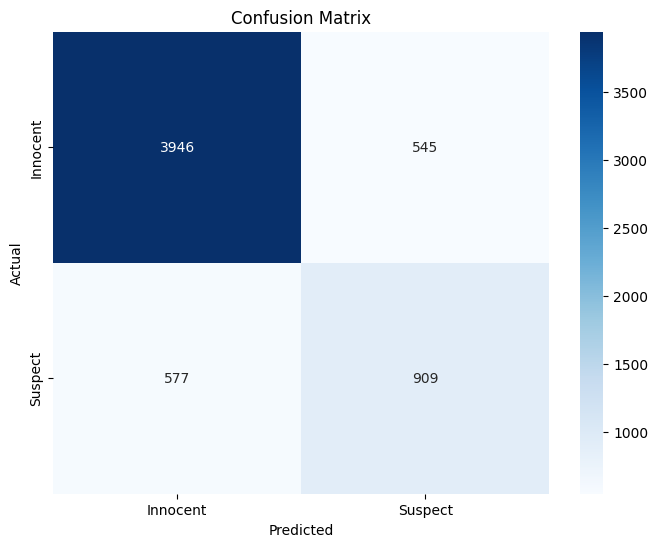

In [47]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Innocent', 'Suspect'], yticklabels=['Innocent', 'Suspect'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

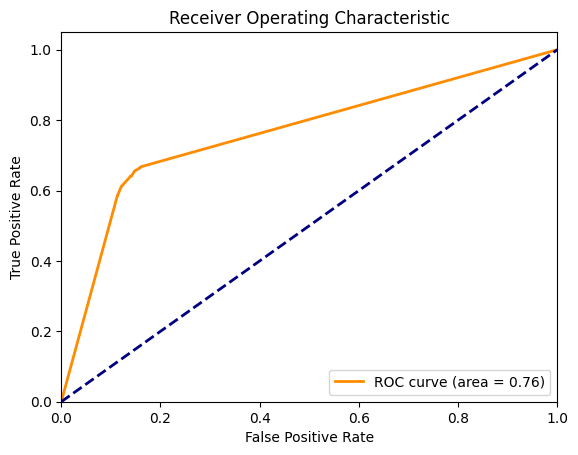

In [48]:
# ROC Curve
y_prob = model_pipeline.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_area['dt'] = roc_auc
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

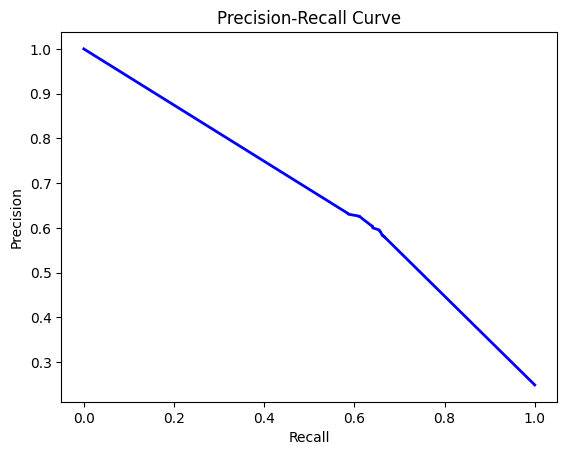

In [49]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Part D:- Building a Custom Ensemble Model: Combining Hand-Coded Naive Bayes with Sklearn Classifiers for Enhanced Performance

In [50]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import LabelEncoder

In [51]:
class VotingEnsemble(BaseEstimator, ClassifierMixin):
    def __init__(self, pipelines):
        self.pipelines = pipelines
        print(self.pipelines)
        self.label_encoder = LabelEncoder()

    def fit(self, X, y):
        # Fit the label encoder for consistency in label handling
        self.label_encoder.fit(y)
        return self

    def predict(self, X):
        # Get predictions from each pipeline
        predictions = np.array([pipeline.predict(X) for pipeline in self.pipelines])
        # Apply majority voting
        return self._majority_voting(predictions)

    def predict_proba(self, X):
        # Get probabilities from each pipeline
        probabilities = np.array([pipeline.predict_proba(X) for pipeline in self.pipelines])
        # Average the probabilities
        return np.mean(probabilities, axis=0)

    def _majority_voting(self, predictions):
        # Transpose predictions to get votes for each instance
        votes = predictions.T
        # Majority voting: mode of the votes
        return np.array([np.bincount(vote).argmax() for vote in votes])

In [52]:
ensemble_model = VotingEnsemble(pipelines=ensemble_clf)
# ensemble_model.fit(X_train, y_train)

[Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['workclass', 'education',
                                                   'maritalstatus',
                                                   'occupation', 'relationship',
                                                   'race', 'sex', 'native']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'educationno',
                                                   'capitalgain', 'capitalloss',
                                                   'hoursperweek'])])),
                ('classifier', GaussianNaiveBayes())]), Pipeline(steps=[('prepro

In [53]:
# Predict on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate the model
accuracy = 100 * accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f} %.\n")
print("Classification Report:\n", cr)

acc_clf['en'] = accuracy
report_clf['en'] = classification_report(y_test, y_pred, output_dict=True)

Accuracy: 84.992 %.

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      4491
           1       0.75      0.60      0.66      1486

    accuracy                           0.85      5977
   macro avg       0.81      0.77      0.78      5977
weighted avg       0.84      0.85      0.84      5977



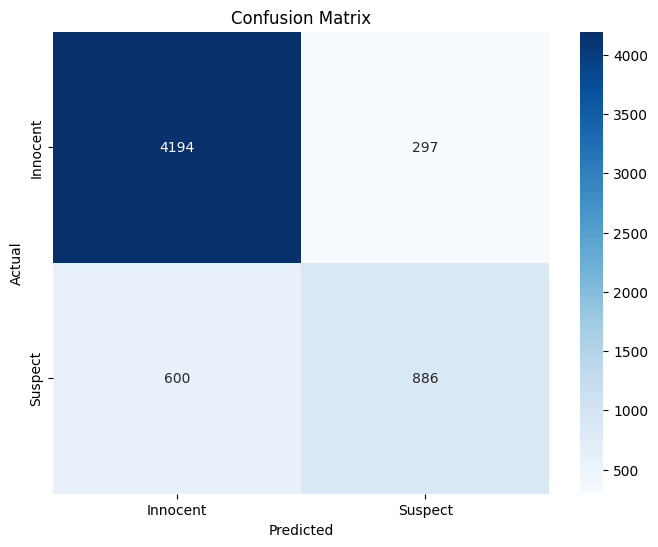

In [54]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Innocent', 'Suspect'], yticklabels=['Innocent', 'Suspect'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

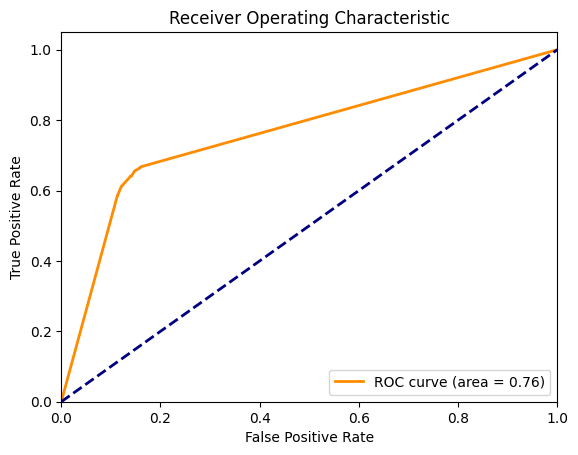

In [55]:
# ROC Curve
y_prob = model_pipeline.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_area['en'] = roc_auc
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

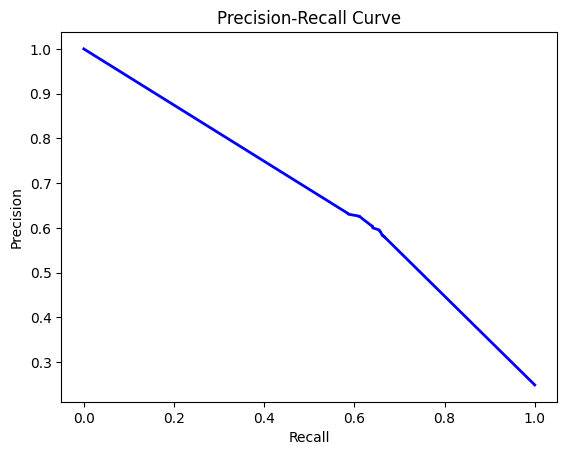

In [56]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Performance Comparison of Individual Classifiers and Ensemble Model

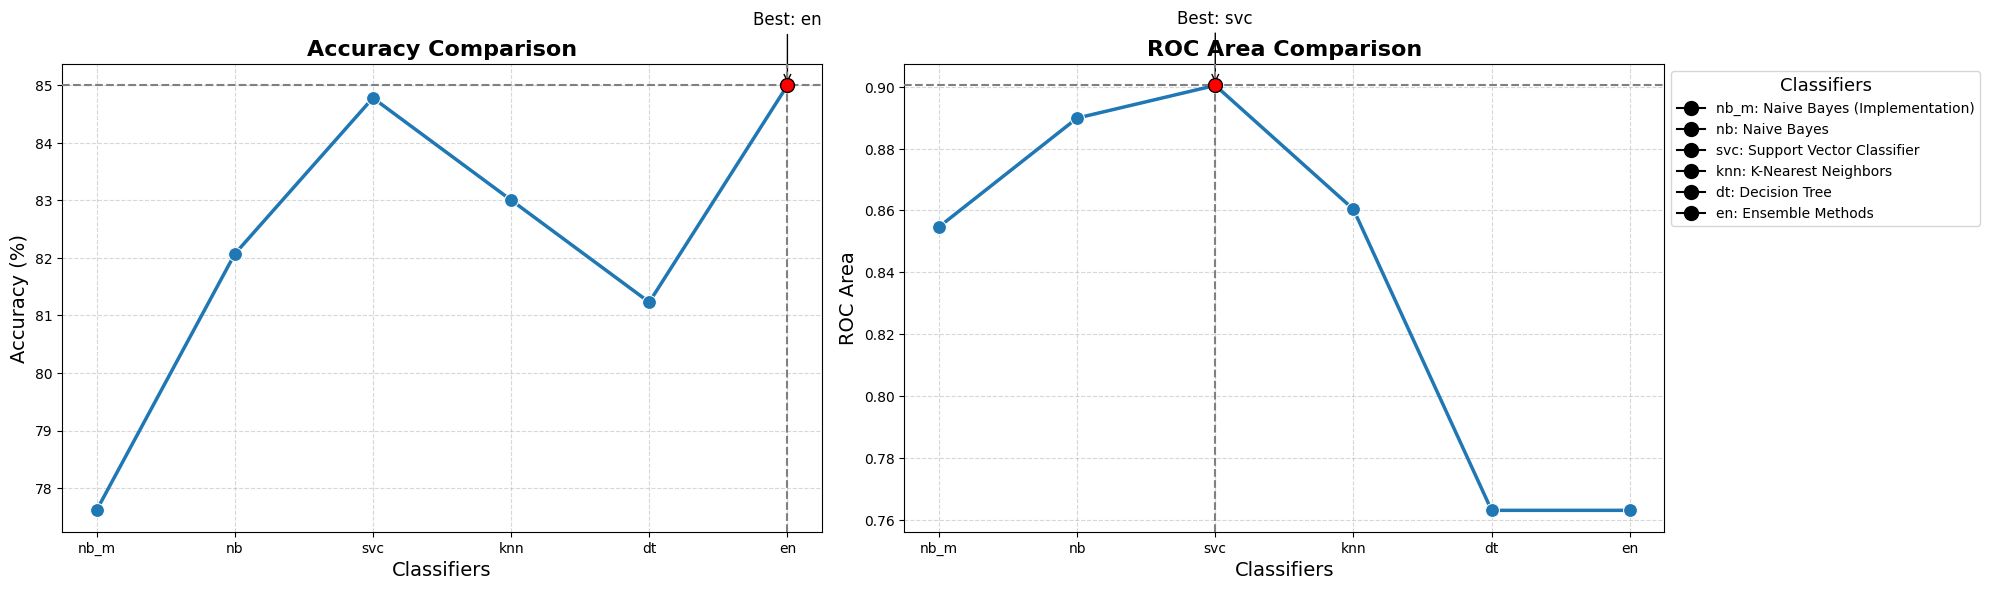

In [57]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC Area']
classifiers = ['nb_m', 'nb', 'svc', 'knn', 'dt', 'en']
def construct_table(label):
    return pd.DataFrame({
        'Precision': {clf: report_clf[clf][label]['precision'] for clf in classifiers},
        'Recall': {clf: report_clf[clf][label]['recall'] for clf in classifiers},
        'F1-Score': {clf: report_clf[clf][label]['f1-score'] for clf in classifiers},
    }).T

df_acc=pd.DataFrame({'Accuracy': acc_clf}).T
df_roc=pd.DataFrame({'ROC Area': roc_area}).T
df_0=construct_table('0')
df_1=construct_table('1')
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Accuracy plot
sns.lineplot(x=df_acc.columns, y=df_acc.loc['Accuracy'], marker='o', linewidth=2.5, markersize=10, ax=axs[0])
axs[0].set_title('Accuracy Comparison', fontsize=16, weight='bold')
axs[0].set_ylabel('Accuracy (%)', fontsize=14)
axs[0].set_xlabel('Classifiers', fontsize=14)
axs[0].grid(True, linestyle='--', alpha=0.5)

# Mark the best accuracy
best_acc_clf = max(acc_clf, key=acc_clf.get)
best_acc_value = acc_clf[best_acc_clf]
axs[0].scatter(best_acc_clf, best_acc_value, color='red', s=100, zorder=5, edgecolor='black')
axs[0].annotate(f'Best: {best_acc_clf}', xy=(best_acc_clf, best_acc_value), xytext=(best_acc_clf, best_acc_value + 1.05),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, ha='center')

# Draw perpendicular lines
axs[0].axhline(y=best_acc_value, color='grey', linestyle='--', xmin=0, xmax=1, zorder=4)
axs[0].axvline(x=best_acc_clf, color='grey', linestyle='--', ymin=0, ymax=1, zorder=4)

# ROC Area plot
sns.lineplot(x=df_roc.columns, y=df_roc.loc['ROC Area'], marker='o', linewidth=2.5, markersize=10, ax=axs[1])
axs[1].set_title('ROC Area Comparison', fontsize=16, weight='bold')
axs[1].set_ylabel('ROC Area', fontsize=14)
axs[1].set_xlabel('Classifiers', fontsize=14)
axs[1].grid(True, linestyle='--', alpha=0.5)

# Mark the best ROC Area
best_roc_clf = max(roc_area, key=roc_area.get)
best_roc_value = roc_area[best_roc_clf]
axs[1].scatter(best_roc_clf, best_roc_value, color='red', s=100, zorder=5, edgecolor='black')
axs[1].annotate(f'Best: {best_roc_clf}', xy=(best_roc_clf, best_roc_value), xytext=(best_roc_clf, best_roc_value + 0.02),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, ha='center')

# Draw perpendicular lines
axs[1].axhline(y=best_roc_value, color='grey', linestyle='--', xmin=0, xmax=1, zorder=4)
axs[1].axvline(x=best_roc_clf, color='grey', linestyle='--', ymin=0, ymax=1, zorder=4)

# Add legends
legend_labels = {
    'nb_m': 'Naive Bayes (Implementation)',
    'nb': 'Naive Bayes',
    'svc': 'Support Vector Classifier',
    'knn': 'K-Nearest Neighbors',
    'dt': 'Decision Tree',
    'en': 'Ensemble Methods'
}
handles = [plt.Line2D([0], [0], color='black', marker='o', markersize=10, linestyle='-', label=f'{k}: {v}') for k, v in legend_labels.items()]

# Add legend to the second subplot (ROC Area)
axs[1].legend(handles=handles, title='Classifiers', title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

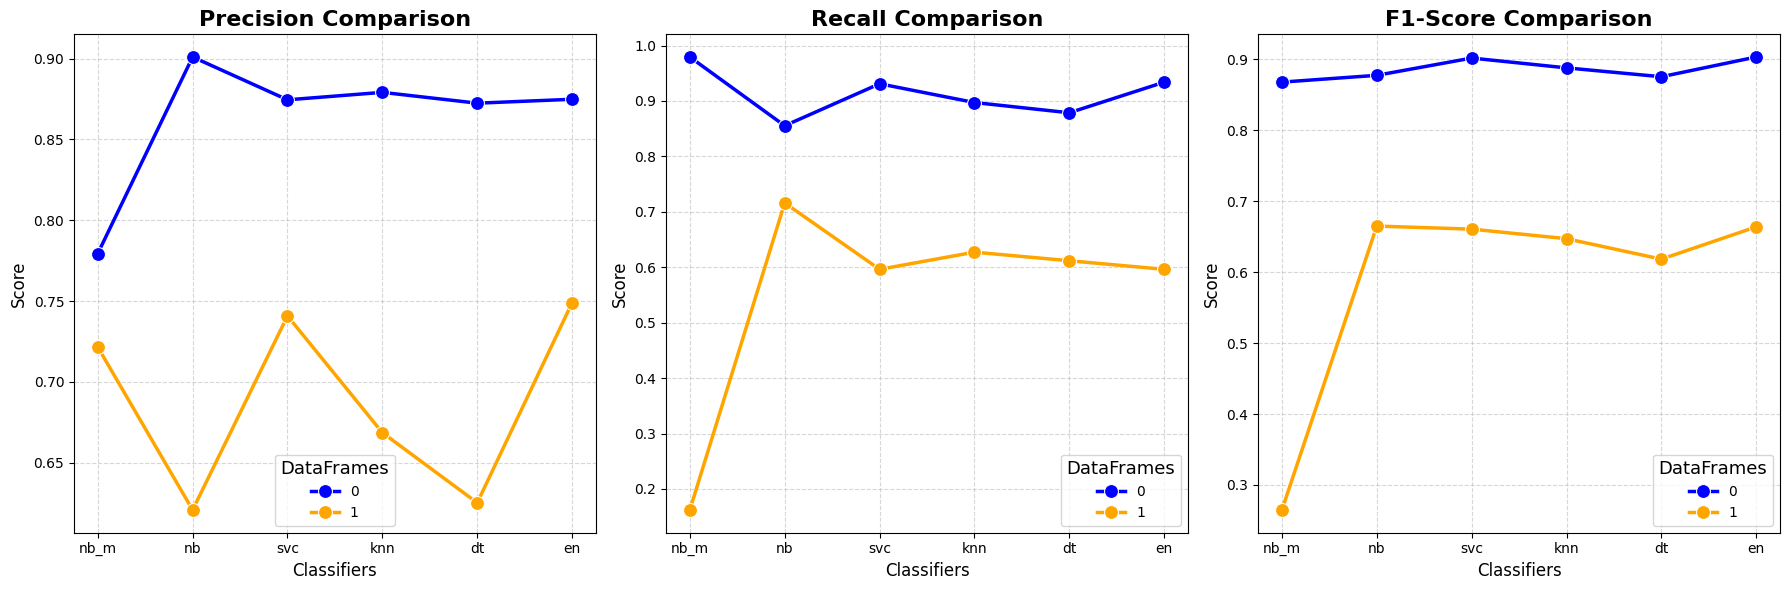

In [58]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Define colors
colors = {'0': 'blue', '1': 'orange'}

# Plot Precision
sns.lineplot(x=df_0.columns, y=df_0.loc['Precision'], marker='o', linewidth=2.5, markersize=10, label='0', ax=axs[0], color=colors['0'])
sns.lineplot(x=df_1.columns, y=df_1.loc['Precision'], marker='o', linewidth=2.5, markersize=10, label='1', ax=axs[0], color=colors['1'])
axs[0].set_title('Precision Comparison', fontsize=16, weight='bold')
axs[0].set_ylabel('Score', fontsize=12)
axs[0].set_xlabel('Classifiers', fontsize=12)
axs[0].legend(title='DataFrames', title_fontsize='13', loc='best')
axs[0].grid(True, linestyle='--', alpha=0.5)

# Plot Recall
sns.lineplot(x=df_0.columns, y=df_0.loc['Recall'], marker='o', linewidth=2.5, markersize=10, label='0', ax=axs[1], color=colors['0'])
sns.lineplot(x=df_1.columns, y=df_1.loc['Recall'], marker='o', linewidth=2.5, markersize=10, label='1', ax=axs[1], color=colors['1'])
axs[1].set_title('Recall Comparison', fontsize=16, weight='bold')
axs[1].set_ylabel('Score', fontsize=12)
axs[1].set_xlabel('Classifiers', fontsize=12)
axs[1].legend(title='DataFrames', title_fontsize='13', loc='best')
axs[1].grid(True, linestyle='--', alpha=0.5)

# Plot F1-Score
sns.lineplot(x=df_0.columns, y=df_0.loc['F1-Score'], marker='o', linewidth=2.5, markersize=10, label='0', ax=axs[2], color=colors['0'])
sns.lineplot(x=df_1.columns, y=df_1.loc['F1-Score'], marker='o', linewidth=2.5, markersize=10, label='1', ax=axs[2], color=colors['1'])
axs[2].set_title('F1-Score Comparison', fontsize=16, weight='bold')
axs[2].set_ylabel('Score', fontsize=12)
axs[2].set_xlabel('Classifiers', fontsize=12)
axs[2].legend(title='DataFrames', title_fontsize='13', loc='best')
axs[2].grid(True, linestyle='--', alpha=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()